In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import re
import nltk
import seaborn as sns

In [191]:
text_data=pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

/home/samuel/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
text_data.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


# Exploration des données textes du tableau et récupération des données texte

In [5]:
for i in range(10):
    print(text_data.iloc[i]['product_url'],text_data.iloc[i]['product_name'])

http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z Elegance Polyester Multicolor Abstract Eyelet Door Curtain
http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH Sathiyas Cotton Bath Towel
http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y Eurospa Cotton Terry Face Towel Set
http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4 SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet
http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU Jaipur Print Cotton Floral King sized Double Bedsheet
http://www.flipkart.com/maserati-time-r8851116001-analog-watch-boys/p/itmeayahfma4r9kp?pid=WATEAYAHJ8CUCAYM Maserati Time R8851116001 Analog Watch  - For Boys
http://www.flipkart.com/camerii-wm64-eleg

In [6]:
for i in range(10):
    print(text_data.iloc[i]['brand'],text_data.iloc[i]['product_specifications'][:80])

Elegance {"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Desig
Sathiyas {"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>
Eurospa {"product_specification"=>[{"key"=>"Material", "value"=>"Cotton Terry"}, {"key"=
SANTOSH ROYAL FASHION {"product_specification"=>[{"key"=>"Brand", "value"=>"SANTOSH ROYAL FASHION"}, {
Jaipur Print {"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>
nan {"product_specification"=>[{"key"=>"Chronograph", "value"=>"Yes"}, {"key"=>"Date
nan {"product_specification"=>[{"key"=>"Chronograph", "value"=>"No"}, {"key"=>"Date 
nan {"product_specification"=>[{"key"=>"Chronograph", "value"=>"No"}, {"key"=>"Altim
nan {"product_specification"=>[{"key"=>"Chronograph", "value"=>"No"}, {"key"=>"Date 
nan {"product_specification"=>[{"key"=>"Chronograph", "value"=>"Yes"}, {"key"=>"Alti


In [7]:
#On va donc conserver pour l'extraction du corpus les colonnes: 'product_name','product_category_tree','description','brand' et 'product_specifications'

In [8]:
texte=text_data[['product_name','product_category_tree','description','brand','product_specifications']].copy()

In [9]:
#On récupère les catégorie principale:
def categorie(x):
    m = re.findall('^\["([A-Za-z& ]*) >', x)
    return m[0]
texte['categorie']=texte['product_category_tree'].apply(lambda x:categorie(x))

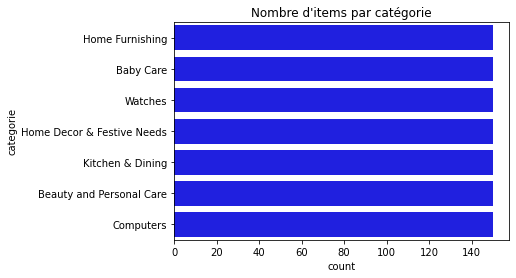

In [10]:
plt.title("Nombre d'items par catégorie")
sns.countplot(y="categorie", data=texte[['categorie']], color='blue')
plt.show()

In [11]:
#on en a exactmeent le même nombre par catégorie

In [12]:
texte.head()

,product_name,product_category_tree,description,brand,product_specifications,categorie
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing


In [13]:
text_data.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [14]:
def spec(x):
    pattern=re.compile(r'=>"(\w+)"')
    matches=pattern.findall(x)
    return ' '.join(matches)

In [15]:
spec(texte['product_specifications'].iloc[0])

'Brand Elegance Door Type Eyelet Duster25 Color Multicolor Length Material Polyester'

In [16]:
#On crée une fonction pour récupérer le texte dans le tableau X:
def corp(X):
    #On récupère product_name:
    corpus=' '.join(X['product_name'])
    #On récupère les catégories:
    corpus+=' '.join(X['product_category_tree'].apply(lambda x:re.findall('>> (\w* *&* \w*)', x))\
                     .apply(lambda x:' '.join(x)))
    #On récupère les descriptions:
    corpus+=' '.join(X['description'])
    #On récupère les brands:
    corpus+=' '.join(X['brand'].fillna(''))
    #On récupère les spécifications:
    pattern=re.compile(r'=>"(\w+)"')
    corpus+=' '.join(X['product_specifications'].fillna('').apply(\
                lambda x:' '.join(pattern.findall(x))))
    corpus = re.sub('[^A-Za-z ]',' ', corpus) #je garde que les mots avec des lettres
    corpus = re.sub('\s+',' ', corpus) #j'enlève les espaces en trop
    return corpus.lower()

In [17]:
#on teste
corp(texte.iloc[0:2])

'elegance polyester multicolor abstract eyelet door curtain sathiyas cotton bath towelcurtains accessories curtains elegance polyester baby bath baby bath sathiyas baby sathiyas cottonkey features of elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm in height pack of price rs this curtain enhances the look of the interiors this curtain is made from high quality polyester fabric it features an eyelet style stitch with metal ring it makes the room environment romantic and loving this curtain is ant wrinkle and anti shrinkage and have elegant apparance give your home a bright and modernistic appeal with these designs the surreal attention is sure to steal hearts these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening you c

In [18]:
#On crée un dictionnaire avec en clé la catégorie et en valeur l'ensemble du corpus dans la catégorie
text_all={}
for i in texte['categorie'].unique():
    text_all[i]=corp(texte[texte['categorie']==i])

# Création d'une première liste de Stopwords

In [19]:
categ=texte['categorie'].unique()

In [20]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
nb_mots={}
#On regarde le nombre de mots par catégories:
from nltk import word_tokenize
nb_mots['init']=[]
for i in categ:
    nb_mots['init'].append(len(word_tokenize(text_all[i])))


In [22]:
nb_mots['init']

[12373, 15752, 11690, 16524, 18296, 11079, 16421]

In [23]:
#Regardonc les nombres de mots différents:

In [24]:
nb_mots['init_diff']=[]
for i in categ:
    nb_mots['init_diff'].append(len(nltk.FreqDist(nltk.word_tokenize(text_all[i]))))


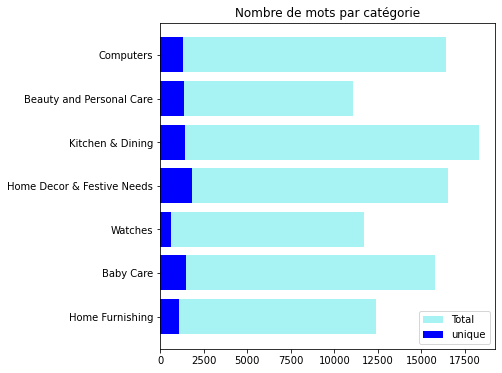

In [25]:
fig=plt.figure(figsize=(6,6))
plt.barh(range(7),nb_mots['init'],color='#A7F2F2',label='Total')
plt.barh(range(7),nb_mots['init_diff'],color='blue',label='unique')
plt.yticks(range(7), categ)
plt.title('Nombre de mots par catégorie')
plt.legend()
plt.show()

In [26]:
#On commence par appliquer les stop_words classiques:

In [27]:
from nltk.corpus import stopwords
sw=set(stopwords.words('english'))

In [28]:
#Pour la suite on va tokenizer nos corpus:
for j in categ:
    text_all[j]=nltk.word_tokenize(text_all[j])


In [29]:
#On supprime cette première liste de sw:
nb_mots['sw1_diff']=[]
for j in categ:
    text_all[j]=[k for k in text_all[j] if k not in sw]
    nb_mots['sw1_diff'].append(len(nltk.FreqDist(text_all[j])))
        

In [30]:
nb_mots

{'init': [12373, 15752, 11690, 16524, 18296, 11079, 16421],
 'init_diff': [1074, 1514, 649, 1840, 1425, 1393, 1340],
 'sw1_diff': [997, 1418, 594, 1746, 1327, 1312, 1256]}

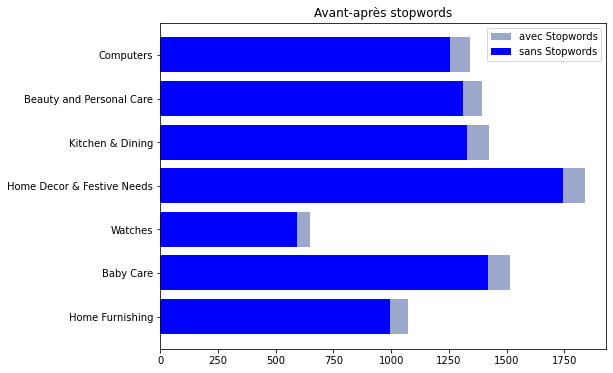

In [31]:
fig=plt.figure(figsize=(8,6))
plt.barh(range(7),nb_mots['init_diff'],color='#9BA8CB',label='avec Stopwords')
plt.barh(range(7),nb_mots['sw1_diff'],color='blue',label='sans Stopwords')
plt.yticks(range(7), categ)
plt.title('Avant-après stopwords')
plt.legend()
plt.show()

# Stemming et Lemmatization

In [32]:
#On teste plusieurs stemmers:

#Stemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

def modif(texte,stemmer):
    count=0
    dico={}
    for mot in texte:
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if m in dico:
                if mot not in dico[m]:
                    dico[m].append(mot)
            else :
                dico[m]=[mot]
    
    return len(dico),count
               


In [33]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print(Name[i],modif(text_all['Watches'],L[i]))

Lancaster (276, 4585)
Porter (205, 3099)
Snowball (196, 2852)


In [34]:
#Lancaster parait plus efficace mais regardons les différences:
def modif2(texte):
    L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
    Name=['Lancaster','Porter','Snowball']
    dico={}
    for i in range(3):
        count=0
        for mot in texte:
            stemm=L[i]
            m=stemm.stem(mot)
            if m!=mot:
                if mot in dico:
                    if Name[i] not in dico[mot]:
                        dico[mot][Name[i]]=m
                else:
                    dico[mot]={Name[i]:m}
    
    return dico

In [35]:
modif2(text_all['Watches'][:200])

{'maserati': {'Lancaster': 'maserat'},
 'time': {'Lancaster': 'tim'},
 'boys': {'Lancaster': 'boy', 'Porter': 'boy', 'Snowball': 'boy'},
 'camerii': {'Lancaster': 'cameri'},
 'elegance': {'Lancaster': 'eleg', 'Porter': 'eleg', 'Snowball': 'eleg'},
 'youth': {'Lancaster': 'you'},
 'digital': {'Lancaster': 'digit', 'Porter': 'digit', 'Snowball': 'digit'},
 'heuer': {'Lancaster': 'heu'},
 'formula': {'Lancaster': 'formul'},
 'cartier': {'Lancaster': 'carty'},
 'lois': {'Lancaster': 'loi', 'Porter': 'loi', 'Snowball': 'loi'},
 'titan': {'Lancaster': 'tit'},
 'srushti': {'Lancaster': 'srusht'},
 'blackred': {'Lancaster': 'blackr', 'Porter': 'blackr', 'Snowball': 'blackr'},
 'women': {'Lancaster': 'wom'},
 'girls': {'Lancaster': 'girl', 'Porter': 'girl', 'Snowball': 'girl'},
 'blackled': {'Lancaster': 'blackl', 'Porter': 'blackl', 'Snowball': 'blackl'},
 'north': {'Lancaster': 'nor'},
 'silicone': {'Lancaster': 'silicon',
  'Porter': 'silicon',
  'Snowball': 'silicon'},
 'bella': {'Lancaster

In [36]:
#On va partir sur Porter, mieux que Snowball mais conserve les marques

In [37]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [38]:
#Voyons avec les Lemmetizer:
#Lemmetizer:
from nltk.stem import WordNetLemmatizer
from textblob import Word,TextBlob

lem=WordNetLemmatizer()
dico={}
countWN=0
countTB=0
countGEN=0
for t in text_all['Watches']:
    if lem.lemmatize(t)!=t:
        countWN+=1
        if t not in dico:
            dico[t]={'WordNet':lem.lemmatize(t)}
    
    w = Word(t)
    if w.lemmatize()!=t:
        countTB+=1
        if t not in dico:
            dico[t]={'TextBlob':w.lemmatize()}
        else:
            dico[t]['TextBlob']=w.lemmatize()
            
print('Wordnet:',countWN,'\t','TextBlob',countTB)
print(dico)



Wordnet: 1272 	 TextBlob 1272
{'boys': {'WordNet': 'boy', 'TextBlob': 'boy'}, 'women': {'WordNet': 'woman', 'TextBlob': 'woman'}, 'girls': {'WordNet': 'girl', 'TextBlob': 'girl'}, 'sports': {'WordNet': 'sport', 'TextBlob': 'sport'}, 'times': {'WordNet': 'time', 'TextBlob': 'time'}, 'tms': {'WordNet': 'tm', 'TextBlob': 'tm'}, 'maxima': {'WordNet': 'maximum', 'TextBlob': 'maximum'}, 'tees': {'WordNet': 'tee', 'TextBlob': 'tee'}, 'fs': {'WordNet': 'f', 'TextBlob': 'f'}, 'sos': {'WordNet': 'so', 'TextBlob': 'so'}, 'watches': {'WordNet': 'watch', 'TextBlob': 'watch'}, 'clocks': {'WordNet': 'clock', 'TextBlob': 'clock'}, 'rs': {'WordNet': 'r', 'TextBlob': 'r'}, 'discounts': {'WordNet': 'discount', 'TextBlob': 'discount'}, 'products': {'WordNet': 'product', 'TextBlob': 'product'}, 'accessories': {'WordNet': 'accessory', 'TextBlob': 'accessory'}, 'wallets': {'WordNet': 'wallet', 'TextBlob': 'wallet'}, 'belts': {'WordNet': 'belt', 'TextBlob': 'belt'}, 'comes': {'WordNet': 'come', 'TextBlob': 'c

In [39]:
#Pas de différence entre les 2 on garde wordnet:
#On va essayer avant après:

lem=WordNetLemmatizer()
def modifapres(texte,stemmer):
    count,count2=0,0
    dico={}
    for mot in texte:
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if lem.lemmatize(m)!=m:
                count2+=1
        else:
            if lem.lemmatize(mot)!=mot:
                count2+=1

    return count,count2

def modifavant(texte,stemmer):
    
    count,count2=0,0
    
    dico={}
    for mot in texte:
        m=lem.lemmatize(mot)
        stemm=stemmer
        if m!=mot:
            count2+=1
            st=stemm.stem(m)
            if st!=m:
                count+=1
        elif stemm.stem(mot)!=mot:
            count+=1
    return(count,count2)


In [40]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print('avant',Name[i],modifavant(text_all['Watches'],L[i]),modifavant(text_all['Watches'],L[i])[0]+modifavant(text_all['Watches'],L[i])[1])
    print('apres',Name[i],modifapres(text_all['Watches'],L[i]),modifapres(text_all['Watches'],L[i])[0]+modifapres(text_all['Watches'],L[i])[1])

avant Lancaster (4046, 1272) 5318
apres Lancaster (4585, 273) 4858
avant Porter (2315, 1272) 3587
apres Porter (3099, 449) 3548
avant Snowball (2098, 1272) 3370
apres Snowball (2852, 479) 3331


In [41]:
#On commance par wordnet puis on fait Porter
#On applique tout cela à nos corpus et on regarde ce que ça donne:

In [42]:
stemmer=PorterStemmer()
lem=WordNetLemmatizer()

nb_mots['diff_ap_st_le']=[]
for j in categ:
    text_all[j]=[stemmer.stem(lem.lemmatize(item)) for item in text_all[j]]
    nb_mots['diff_ap_st_le'].append(len(nltk.FreqDist(text_all[j])))

In [43]:
nb_mots['diff_ap_st_le']

[853, 1213, 551, 1459, 1137, 1133, 1093]

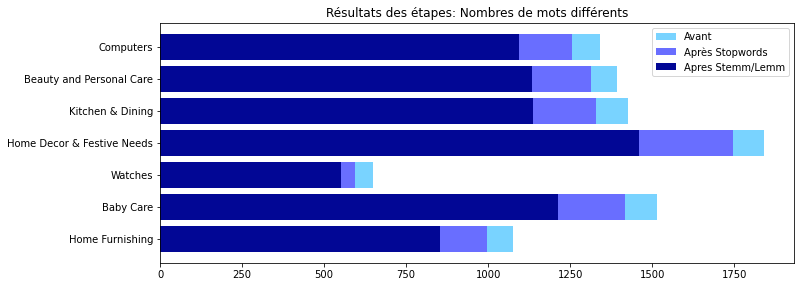

In [44]:
fig=plt.figure(figsize=(25,15))
plt.subplot(3,2,i+1)
plt.barh(range(7),nb_mots['init_diff'],color='#79D3FF',label='Avant')
plt.barh(range(7),nb_mots['sw1_diff'],color='#696EFF',label='Après Stopwords')
plt.barh(range(7),nb_mots['diff_ap_st_le'],color='#020795',label='Apres Stemm/Lemm')
plt.yticks(range(7), categ)
plt.title('Résultats des étapes: Nombres de mots différents')
plt.legend()
plt.show()

# Analyse des fréquences:

In [45]:
tout=[]
for i in categ:
    tout+=text_all[i]
a=nltk.FreqDist(tout)
len(a)

4284

In [46]:
#Je regarde la répartition de mes mots par catégorie

In [47]:
d={}
D=dict(a)
for i in D.keys():
    d[i]={'all':D[i]}
    for j in categ:
        d2=dict(nltk.FreqDist(text_all[j]))
        if i in d2:
            d[i][j]=d2[i]
        else:
            d[i][j]=0


In [48]:
dat=pd.DataFrame(d)


In [49]:
dat=dat.T

In [50]:
dat

,all,Home Furnishing,Baby Care,Watches,Home Decor & Festive Needs,Kitchen & Dining,Beauty and Personal Care,Computers
eleg,69,14,3,4,13,34,1,0
polyest,116,108,5,0,0,0,3,0
multicolor,301,115,30,7,71,14,8,56
abstract,104,77,4,0,11,12,0,0
eyelet,82,82,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
sata,2,0,0,0,0,0,0,2
game,1,0,0,0,0,0,0,1
cach,2,0,0,0,0,0,0,2
recharg,6,0,0,0,0,0,0,6


In [51]:
#Je commence par enlever les mots qui ne sont pas présent plus de 10 fois dans tout le corpus
#Car peu représentatif d'une catégorie

In [52]:
mots=dat[dat['all']>=10].copy()

In [53]:
newsw=set(dat[dat['all']<10].index.tolist())
newsw

{'shell',
 'macintosh',
 'glamour',
 'rl',
 'centrestrip',
 'cmcandl',
 'fare',
 'amazwh',
 'nurseri',
 'ski',
 'ro',
 'parent',
 'smoke',
 'vibrat',
 'ayurveda',
 'repres',
 'brick',
 'surround',
 'karahi',
 'rishak',
 'likewis',
 'loi',
 'machinewash',
 'shock',
 'multivitamin',
 'shoperit',
 'access',
 'ribber',
 'rajasthanikart',
 'entranc',
 'distribut',
 'polym',
 'painstakingli',
 'robinson',
 'surahi',
 'tobacco',
 'ajmal',
 'dco',
 'root',
 'spong',
 'angri',
 'purs',
 'wf',
 'ppsn',
 'hindu',
 'info',
 'electrotherapi',
 'tr',
 'woodi',
 'view',
 'dru',
 'transit',
 'jute',
 'realli',
 'oodl',
 'zero',
 'advis',
 'island',
 'grind',
 'aster',
 'itali',
 'oud',
 'treat',
 'among',
 'gorgeou',
 'block',
 'bristl',
 'monster',
 'camouflag',
 'dosa',
 'clinic',
 'teatim',
 'amnesia',
 'tg',
 'fight',
 'tshirt',
 'vol',
 'three',
 'elegantli',
 'fascin',
 'excess',
 'lavendar',
 'soapston',
 'contend',
 'count',
 'kool',
 'zeflowerbtton',
 'viscou',
 'industri',
 'embrac',
 'accor

In [54]:
mots.columns=['all','Furnishing','Baby','Watches','Decor','Kitchen','Beauty','Computer']

In [55]:
mots['std']=mots[['Furnishing','Baby','Watches','Decor','Kitchen','Beauty','Computer']].T.std()/mots[['Furnishing','Baby','Watches','Decor','Kitchen','Beauty','Computer']].T.mean()
mots

,all,Furnishing,Baby,Watches,Decor,Kitchen,Beauty,Computer,std
eleg,69,14,3,4,13,34,1,0,1.219403
polyest,116,108,5,0,0,0,3,0,2.435783
multicolor,301,115,30,7,71,14,8,56,0.933521
abstract,104,77,4,0,11,12,0,0,1.876758
eyelet,82,82,0,0,0,0,0,0,2.645751
...,...,...,...,...,...,...,...,...,...
gum,10,0,0,0,0,0,0,10,2.645751
residu,10,0,0,0,0,0,0,10,2.645751
encrypt,13,0,0,0,0,0,0,13,2.645751
firewal,11,0,0,0,0,0,0,11,2.645751


In [56]:
mots=mots.sort_values(by='std',ascending=False)

In [57]:
mots

,all,Furnishing,Baby,Watches,Decor,Kitchen,Beauty,Computer,std
cotonex,32,32,0,0,0,0,0,0,2.645751
oxyglow,43,0,0,0,0,0,43,0,2.645751
runner,16,16,0,0,0,0,0,0,2.645751
adapt,164,0,0,0,0,0,0,164,2.645751
nappi,16,0,16,0,0,0,0,0,2.645751
...,...,...,...,...,...,...,...,...,...
free,623,78,46,134,83,59,111,112,0.353650
type,1053,170,192,154,158,186,53,140,0.310000
product,877,94,64,136,141,130,157,155,0.272773
red,118,18,18,16,16,23,12,15,0.200962


In [58]:
#On ne garde que les 1000 mots avec la variance normalisée la plus importante (on en garde assez pour
# être sûr d'avoir des mots pour chaque catégorie)

In [59]:
corpus=mots.iloc[:800,:]
newsw.update(set(mots.iloc[800:,:].index.tolist()))

In [60]:
newsw

{'shell',
 'pure',
 'macintosh',
 'glamour',
 'rl',
 'centrestrip',
 'cmcandl',
 'fare',
 'amazwh',
 'depth',
 'nurseri',
 'four',
 'ski',
 'ro',
 'parent',
 'smoke',
 'vibrat',
 'ayurveda',
 'repres',
 'brick',
 'surround',
 'karahi',
 'rishak',
 'likewis',
 'loi',
 'machinewash',
 'shock',
 'bright',
 'multivitamin',
 'shoperit',
 'access',
 'ribber',
 'rajasthanikart',
 'entranc',
 'distribut',
 'polym',
 'painstakingli',
 'robinson',
 'surahi',
 'tobacco',
 'ajmal',
 'dco',
 'price',
 'root',
 'spong',
 'angri',
 'purs',
 'wf',
 'ppsn',
 'hindu',
 'info',
 'electrotherapi',
 'tr',
 'woodi',
 'view',
 'dru',
 'transit',
 'jute',
 'sticker',
 'realli',
 'oodl',
 'zero',
 'advis',
 'island',
 'grind',
 'aster',
 'itali',
 'oud',
 'treat',
 'among',
 'gorgeou',
 'block',
 'bristl',
 'monster',
 'king',
 'camouflag',
 'dosa',
 'clinic',
 'teatim',
 'r',
 'amnesia',
 'tg',
 'fight',
 'tshirt',
 'vol',
 'three',
 'elegantli',
 'fascin',
 'excess',
 'lavendar',
 'soapston',
 'contend',
 'c

In [61]:
corpus

,all,Furnishing,Baby,Watches,Decor,Kitchen,Beauty,Computer,std
cotonex,32,32,0,0,0,0,0,0,2.645751
oxyglow,43,0,0,0,0,0,43,0,2.645751
runner,16,16,0,0,0,0,0,0,2.645751
adapt,164,0,0,0,0,0,0,164,2.645751
nappi,16,0,16,0,0,0,0,0,2.645751
...,...,...,...,...,...,...,...,...,...
get,84,2,6,2,11,52,5,6,1.491488
tube,20,0,0,0,3,0,6,11,1.490805
mdf,18,0,7,0,9,0,2,0,1.486911
stainless,65,0,2,16,5,38,4,0,1.485366


# On crée nos bag of words

In [62]:
def cleaning(name,description,specification,brand,category):
    stemmer=PorterStemmer()
    lem=WordNetLemmatizer()
    
    categories=' '.join(re.findall('>> (\w* *&* \w*)', category)) #on extrait les mots des catégories
    pattern=re.compile(r'=>"(\w+)"')
    specifications=' '.join(pattern.findall(specification)) #On extrait les mots des spec
    
    all_words = ' '.join([name, description, brand, categories, specifications])
    
    all_words_clean = re.sub('[^A-Za-z ]',' ', all_words) #je garde que les mots avec des lettres
    final = re.sub('\s+',' ', all_words_clean) #j'enlève les espaces en trop
    
    bow = nltk.word_tokenize(final) #on tokenize
    #on enleve les premiers sw et on met en minuscule:
    bow=[item.lower() for item in bow if item.lower() not in sw]
    #On lemmatize puis on stemize:
    bow=[stemmer.stem(lem.lemmatize(item)) for item in bow]
    #on ne garde que les mots qui ne sont pas dans notre deuxième liste de SWs
    return ' '.join([w for w in bow if w not in newsw]) 


In [63]:
text_data.fillna('',inplace=True) #On remplace les nan et on applique la fonction au dataframe
texte['bow'] = np.vectorize(cleaning)(text_data['product_name'],text_data['description'],\
                                          text_data['product_specifications'],text_data['brand'],\
                                          text_data['product_category_tree'])


In [64]:
texte.head(4)

,product_name,product_category_tree,description,brand,product_specifications,categorie,bow
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,polyest abstract eyelet door curtain polyest a...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,cotton towel cotton towel towel towel machin c...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,eurospa cotton terri towel eurospa cotton terr...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,santosh cotton bedsheet santosh cotton bedshee...


In [65]:
#On vérifie que l'on a exactement 1000 mots différents:
a=' '.join(texte['bow'])
b=nltk.word_tokenize(a)
c=nltk.FreqDist(b)
len(c)

800

In [66]:
#C'est bon

In [67]:
texte['bow'].apply(lambda x:len(x)).describe()

count    1050.000000
mean      207.471429
std       157.700769
min         3.000000
25%        98.000000
50%       162.500000
75%       274.000000
max      1231.000000
Name: bow, dtype: float64

In [68]:
texte['categorie'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [69]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [70]:
texte['cluster']=texte['categorie'].apply(lambda x:cat(x))

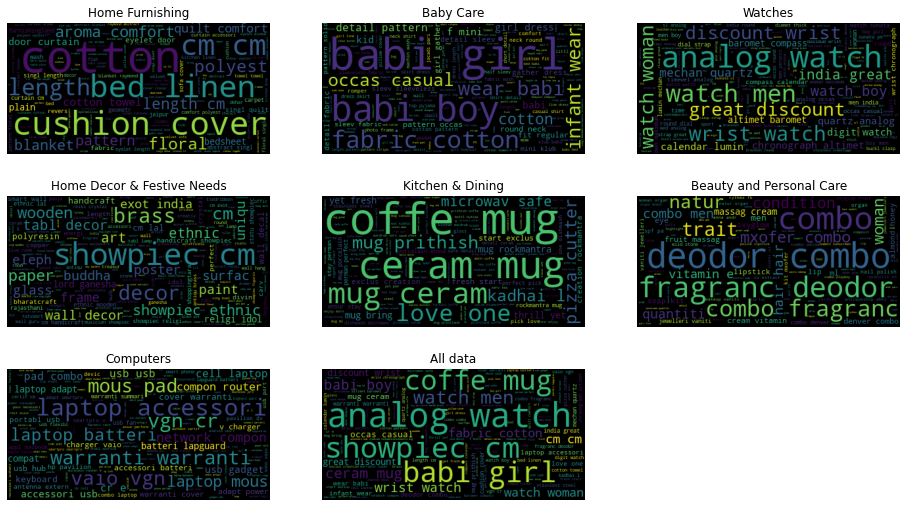

In [71]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="black")
fig=figure(figsize=(16,9))
k=1
for i in categ:
    plt.subplot(3,3,k)
    df=texte[texte['categorie']==i]
    wordcloud.generate(" ".join(df['bow']))
    plt.imshow(wordcloud)
    plt.title(i)
    plt.axis('off')
    k+=1
plt.subplot(3,3,8)
wordcloud.generate(" ".join(texte['bow']))
plt.imshow(wordcloud)
plt.title('All data')
plt.axis('off')
plt.show()

# On va applider une tf_idf

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize)
values = tfidf.fit_transform(texte['bow'])


In [73]:
X=values.toarray()

In [74]:
tsne=TSNE(n_components=2,perplexity=40)
X_trans=tsne.fit_transform(X)

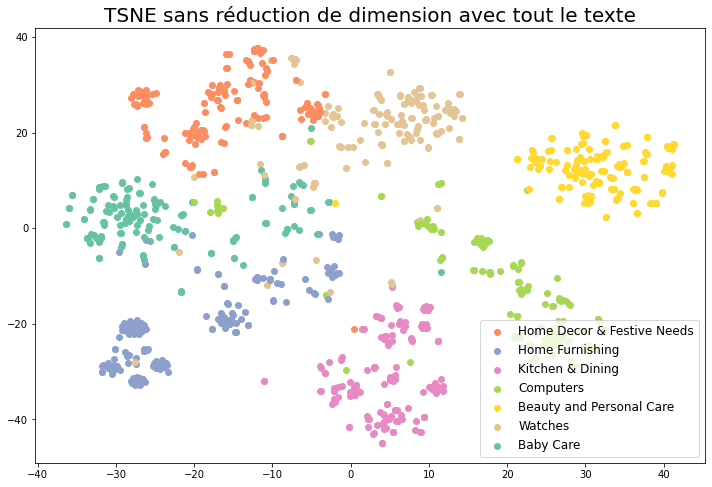

In [75]:
labels=['Home Decor & Festive Needs','Home Furnishing','Kitchen & Dining','Computers','Beauty and Personal Care','Watches','Baby Care']
fig=plt.figure(figsize=(12,8))
for i in range(text_data.shape[0]):
    cat=texte['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),labels,prop={'size':12})
plt.title('TSNE sans réduction de dimension avec tout le texte',size=20)
plt.xlim=(-X_trans[:,0].min(),-X_trans[:,0].max())
plt.ylim=(-X_trans[:,1].min(),-X_trans[:,1].max())
plt.show()

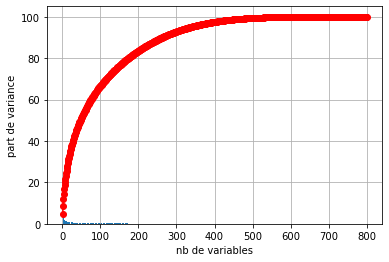

In [76]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("nb de variables")
    plt.ylabel("part de variance")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=800)
pca.fit(X)
display_scree_plot(pca)

In [77]:
pca = decomposition.PCA(n_components=500)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 500)


In [78]:
X_trans=tsne.fit_transform(X_proj)

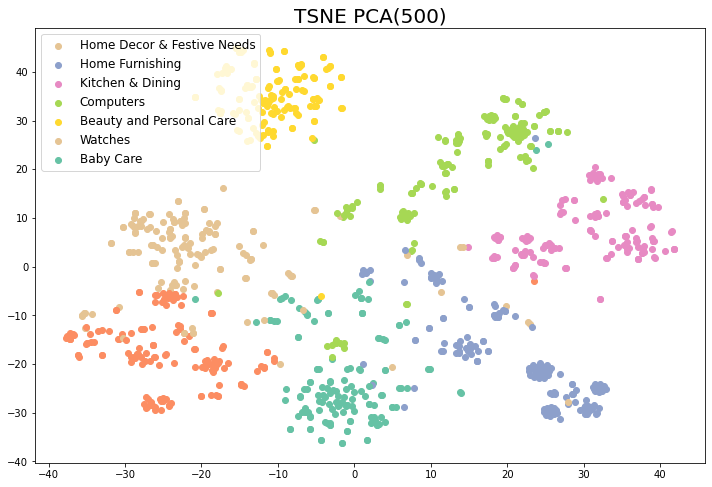

In [79]:
fig=plt.figure(figsize=(12,8))
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=texte['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),labels,prop={'size':12})
plt.title('TSNE PCA(500)',size=20)
plt.show()

In [80]:
#On essai avec des bi-grammes:

In [81]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,ngram_range=(2,2))
values = tfidf.fit_transform(texte['bow'])


In [82]:
X=values.toarray()

In [83]:
tsne=TSNE(n_components=2,perplexity=40)
X_trans=tsne.fit_transform(X)

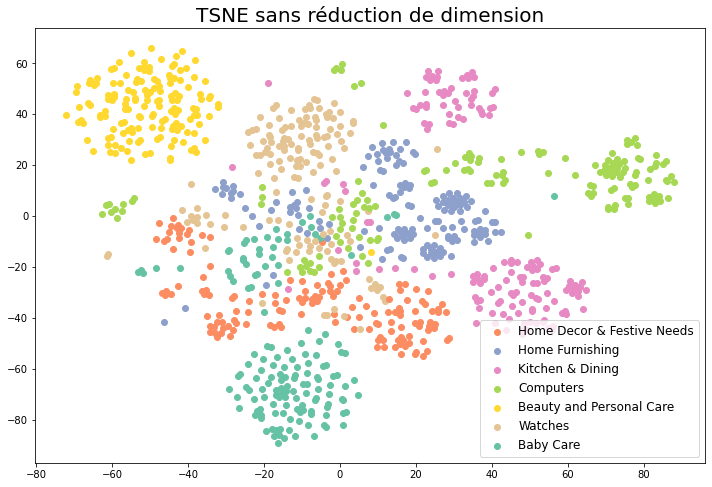

In [84]:
fig=plt.figure(figsize=(12,8))
for i in range(texte.shape[0]):
    cat=texte['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),labels,prop={'size':12})
plt.title('TSNE sans réduction de dimension',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

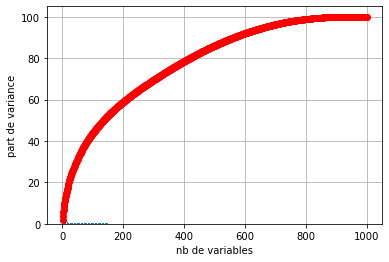

In [85]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("nb de variables")
    plt.ylabel("part de variance")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [86]:
pca = decomposition.PCA(n_components=200)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 200)


In [87]:
X_trans=tsne.fit_transform(X_proj)

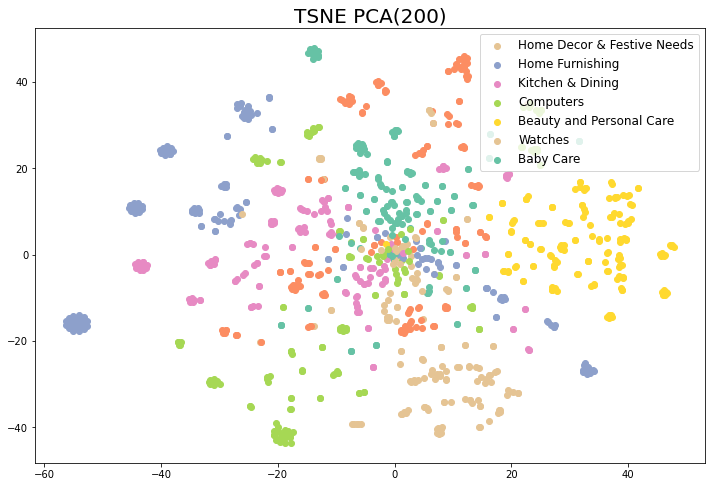

In [88]:
fig=plt.figure(figsize=(12,8))
for i in range(texte.shape[0]):
    for j in range(7):
        cat=texte['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),labels,prop={'size':12})
plt.title('TSNE PCA(200)',size=20)
plt.show()

In [89]:
#On va rester sur des monogrammes

In [90]:
#On va partir sur une perplexité de 40 pour l'observation

In [91]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize)
values = tfidf.fit_transform(texte['bow'])
X=values.toarray()

In [92]:
pca = decomposition.PCA(n_components=500)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 500)


In [93]:
tsne=TSNE(n_components=2,perplexity=40)
X_trans=tsne.fit_transform(X_proj)

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score,davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler,QuantileTransformer,Normalizer,StandardScaler

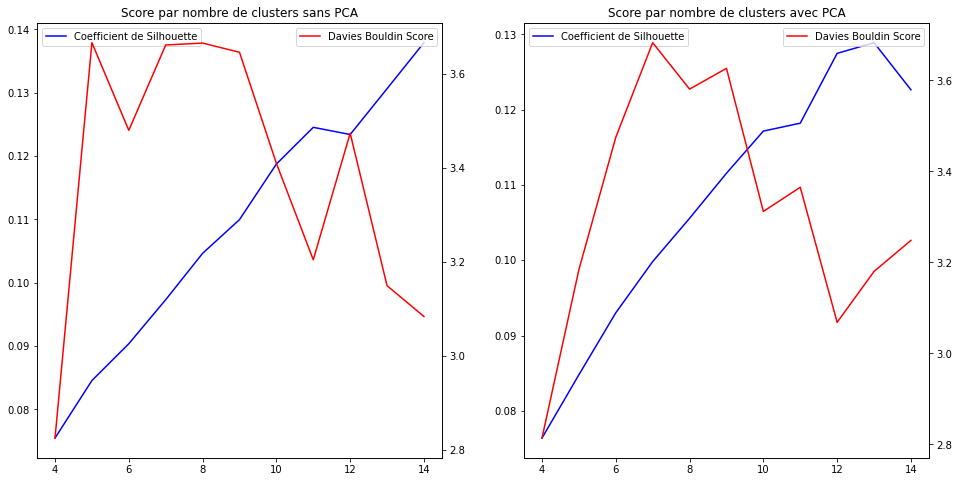

In [95]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
silhouette=[]
DB=[]

for i in range(4,15):
    
    km=KMeans(n_clusters=i)
    km.fit(X)
    y=km.predict(X)
    silhouette.append(silhouette_score(X,y))
    DB.append(davies_bouldin_score(X,y))
     
sil=plt.plot(range(4,15),silhouette,c='b')
plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
ax2 = pyplot.gca().twinx()
db=plt.plot(range(4,15),DB,c='r')
plt.legend(db,['Davies Bouldin Score'],loc='upper right')
plt.title('Score par nombre de clusters sans PCA')

plt.subplot(1,2,2)
silhouette=[]
DB=[]

for i in range(4,15):
    
    km=KMeans(n_clusters=i)
    km.fit(X_proj)
    y=km.predict(X_proj)
    silhouette.append(silhouette_score(X_proj,y))
    DB.append(davies_bouldin_score(X_proj,y))
     
sil=plt.plot(range(4,15),silhouette,c='b')
plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
ax2 = pyplot.gca().twinx()
db=plt.plot(range(4,15),DB,c='r')
plt.legend(db,['Davies Bouldin Score'],loc='upper right')
plt.title('Score par nombre de clusters avec PCA')


plt.show()

In [96]:
#Comparons les scores de clustering avec ou sans PCA:
#Pour entre 6 et 18 clusters 

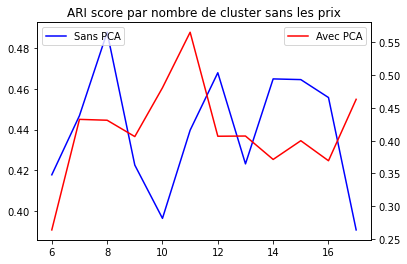

In [97]:
sanspca=[]
avecpca=[]
for i in range(6,18):
    kmpca=KMeans(n_clusters=i)
    kmpca.fit(X_proj)
    ypca=kmpca.predict(X_proj)

    km==KMeans(n_clusters=i)
    km.fit(X)
    y=km.predict(X)
    
    sanspca.append(adjusted_rand_score(y,texte['cluster']))
    avecpca.append(adjusted_rand_score(ypca,texte['cluster']))

sans=plt.plot(range(6,18),sanspca,c='b')
plt.legend(sans,['Sans PCA'],loc='upper left')
ax2 = pyplot.gca().twinx()
avec=plt.plot(range(6,18),avecpca,c='r')
plt.legend(avec,['Avec PCA'],loc='upper right')
plt.title('ARI score par nombre de cluster sans les prix')

plt.show()


In [98]:
#Regardons ce que cela donne si on rajoute les colonnes normalisées prix et discount price:

In [99]:
prices=pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')[['retail_price','discounted_price']]

In [100]:
Y=np.hstack((prices.values,X_proj))

In [101]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
Y=knn.fit_transform(Y)


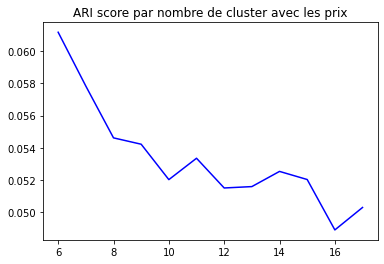

In [102]:
avecprix=[]

Y_std=Normalizer().fit_transform(Y)

for i in range(6,18):
    kmpca=KMeans(n_clusters=i)
    kmpca.fit(Y_std)
    ypca=kmpca.predict(Y_std)

    avecprix.append(adjusted_rand_score(ypca,texte['cluster']))

sans=plt.plot(range(6,18),avecprix,c='b')
plt.title('ARI score par nombre de cluster avec les prix')

plt.show()

In [103]:
#à 11 et 12 clusters on est pas mal

In [104]:
#On va regarder plusieurs clustering avec PCA pour voir ce que ça donne:


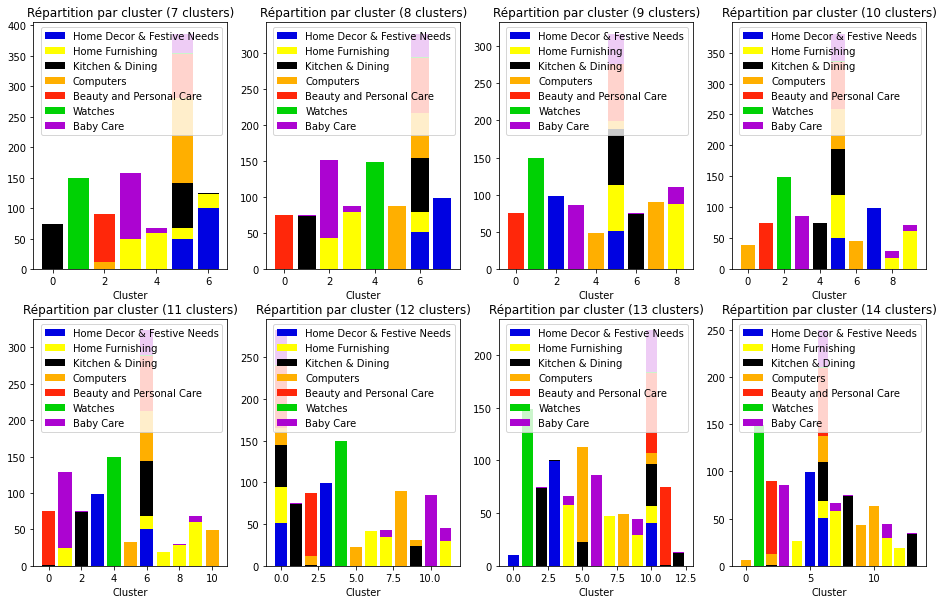

In [105]:
colors=['#0002E1','#FFFF00','#000000','#FFAF00','#FF270A','#00D104','#AC04D1']

plt.figure(figsize=(16,10))
for k in range(8):
    km=KMeans(n_clusters=7+k)
    km.fit(X_proj)
    y=km.predict(X_proj)
    
    res=pd.DataFrame(np.vstack((y,texte['cluster'])).T)
    res.columns=['predicted','true']
    
    df=pd.DataFrame(res.groupby(by=['predicted','true'])[['true']].aggregate('count').unstack().values).fillna(0)
    df.columns=labels
    
    
    r=range(7+k)
    
    plt.subplot(2,4,k+1)
    
    a=np.zeros(7+k)
    for j in range(7):
        a+=df[labels[j]]
        plt.bar(r, df[labels[j]],bottom=a-df[labels[j]], color=colors[j],label=labels[j])
    plt.title("Répartition par cluster ("+str(7+k)+" clusters)")
    plt.xlabel("Cluster")
    plt.legend()
plt.show()

In [106]:
#On part sur 9 clusters

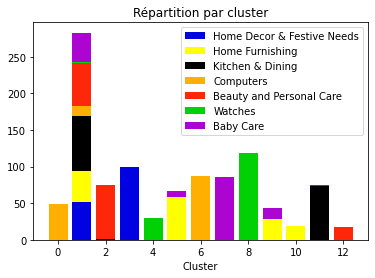

In [107]:
km13=KMeans(n_clusters=13)
km13.fit(X_proj)
y=km13.predict(X_proj)

res=pd.DataFrame(np.vstack((y,texte['cluster'])).T)
res.columns=['predicted','true']
    
df=pd.DataFrame(res.groupby(by=['predicted','true'])[['true']].aggregate('count').unstack().values).fillna(0)
df.columns=labels
    
    
r=range(13)
    
a=np.zeros(13)
for j in range(7):
    a+=df[labels[j]]
    plt.bar(r, df[labels[j]],bottom=a-df[labels[j]], color=colors[j],label=labels[j])
plt.title("Répartition par cluster")
plt.xlabel("Cluster")
plt.legend()
plt.show()

In [108]:
#Au final les prédiction sont quasi toutes correctes pour les clusters en dehors du 1,5 et 9
#Donc soit plus de 66% de bonnes allocations:
adjusted_rand_score(y,texte['cluster'])

0.41280104027801606

In [124]:
pred_km={0:3,2:4,3:0,4:5,5:1,6:3,7:6,8:5,10:1,11:2,12:4}

# LDA

In [113]:
#On effectue une LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7

tf_vect=CountVectorizer()
tf=tf_vect.fit_transform(texte['bow'])

# Créer le modèle LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=6, learning_method='batch')

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(max_iter=6, n_components=7)

In [114]:
Xlda=lda.transform(tf)

In [115]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vect.get_feature_names(), no_top_words)


Topic 0:
babi cotton girl fabric boy detail dress pattern sleev neck
Topic 1:
watch analog men wrist woman round usb india great discount
Topic 2:
combo wall hair deodor fragranc natur quantiti oil organ woman
Topic 3:
mug ceram coffe kadhai love art one diamet perfect tea
Topic 4:
cm showpiec cover ethnic cushion tabl brass decor pizza wooden
Topic 5:
mug towel blanket comfort singl cotton bed curtain length polyest
Topic 6:
laptop warranti batteri usb adapt power accessori rockmantra smartpro lapguard


In [116]:
Xlda

array([[0.00224519, 0.0022331 , 0.00223475, ..., 0.002242  , 0.98657312,
        0.0022334 ],
       [0.46308217, 0.09308669, 0.00596434, ..., 0.00595321, 0.42000836,
        0.0059525 ],
       [0.29015586, 0.03478348, 0.00227407, ..., 0.00227455, 0.36983816,
        0.29840585],
       ...,
       [0.67441449, 0.01190529, 0.01195686, ..., 0.2660032 , 0.01190916,
        0.01190477],
       [0.18956244, 0.01428828, 0.73896822, ..., 0.0142908 , 0.01430835,
        0.01428572],
       [0.904751  , 0.01587372, 0.01587364, ..., 0.01587441, 0.01587915,
        0.01587302]])

In [112]:
#On reconnait assez bien nos topics:
#même si il y a encore pas mal de mélanges
a=(

SyntaxError: unexpected EOF while parsing (<ipython-input-112-1c8e5290a569>, line 3)

In [117]:
Xlda

array([[0.00224519, 0.0022331 , 0.00223475, ..., 0.002242  , 0.98657312,
        0.0022334 ],
       [0.46308217, 0.09308669, 0.00596434, ..., 0.00595321, 0.42000836,
        0.0059525 ],
       [0.29015586, 0.03478348, 0.00227407, ..., 0.00227455, 0.36983816,
        0.29840585],
       ...,
       [0.67441449, 0.01190529, 0.01195686, ..., 0.2660032 , 0.01190916,
        0.01190477],
       [0.18956244, 0.01428828, 0.73896822, ..., 0.0142908 , 0.01430835,
        0.01428572],
       [0.904751  , 0.01587372, 0.01587364, ..., 0.01587441, 0.01587915,
        0.01587302]])

In [118]:
LDA=pd.DataFrame(Xlda)

In [119]:
LDA[1]

0       0.002233
1       0.093087
2       0.034783
3       0.002434
4       0.001905
          ...   
1045    0.002238
1046    0.003505
1047    0.011905
1048    0.014288
1049    0.015874
Name: 1, Length: 1050, dtype: float64

In [120]:
LDA['max']=LDA.T.idxmax()

In [121]:
LDA['max']

0       5
1       0
2       5
3       0
4       0
       ..
1045    2
1046    2
1047    0
1048    2
1049    0
Name: max, Length: 1050, dtype: int64

In [122]:
adjusted_rand_score(LDA['max'],texte['cluster'])

0.45336090688664704

In [155]:
#On va regarder différents nombres de clusters et calculer l'ARI:
tf_vect=CountVectorizer()
tf=tf_vect.fit_transform(texte['bow'])

for n_topics in range(7,15):
    # Créer le modèle LDA
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=6, learning_method='batch')

    # Fitter sur les données
    lda.fit(tf)
    Xlda=lda.transform(tf)
    LDA=pd.DataFrame(Xlda)
    LDA['max']=LDA.T.idxmax()
    print(n_topics,' clusters', 'ARI=', adjusted_rand_score(LDA['max'],texte['cluster']))

7  clusters ARI= 0.25418506826586945
8  clusters ARI= 0.4457715398656262
9  clusters ARI= 0.386525699394916
10  clusters ARI= 0.413298499088045
11  clusters ARI= 0.4538807084632608
12  clusters ARI= 0.30933745629017706
13  clusters ARI= 0.537837842458119
14  clusters ARI= 0.41266882576737757


In [159]:
#On essai de voir ce que cela donne avec 13 clusters:
#On va regarder différents nombres de clusters et calculer l'ARI:
tf_vect=CountVectorizer()
tf=tf_vect.fit_transform(texte['bow'])

# Créer le modèle LDA
lda = LatentDirichletAllocation(n_components=13, max_iter=6, learning_method='batch')

# Fitter sur les données
lda.fit(tf)
Xlda=lda.transform(tf)
LDA=pd.DataFrame(Xlda)
LDA['max']=LDA.T.idxmax()

print(adjusted_rand_score(LDA['max'],texte['cluster']))

0.5145101035024185


/home/samuel/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


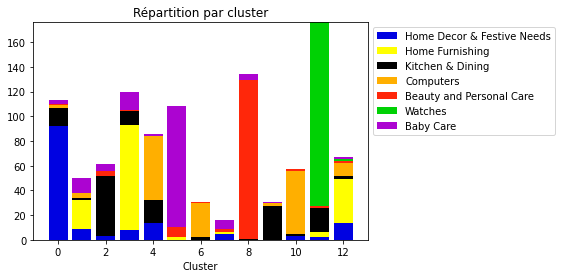

In [171]:
#On a encore de bons résultats, regardons ce que cela donne:
res=pd.DataFrame(np.vstack((LDA['max'],texte['cluster'])).T)
res.columns=['predicted','true']
    
df=pd.DataFrame(res.groupby(by=['predicted','true'])[['true']].aggregate('count').unstack().values).fillna(0)
df.columns=labels
    
    
r=range(13)
    
a=np.zeros(13)
for j in range(7):
    a+=df[labels[j]]
    plt.bar(r, df[labels[j]],bottom=a-df[labels[j]], color=colors[j],label=labels[j])
plt.title("Répartition par cluster")
plt.xlabel("Cluster")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [161]:
#On va conserver la prédiction du km13 pour les clusters différents de 1,5 et 9 
#et pour ceux-ci, on prendra la prédiction de la LDA qui nous donne en gros:
LDA_pred={0:0,1:1,2:2,3:1,4:3,5:6,6:3,7:6,8:4,9:2,10:3,11:5,12:1}



In [162]:
def transform(row):
    if row['kmean']!=5 and row['kmean']!=1 and row['kmean']!=9:
        row['predicted']=pred_km[row['kmean']]
    else:
        row['predicted']=LDA_pred[row['lda']]
    return row

In [163]:
results=pd.DataFrame(np.vstack((texte['cluster'],LDA['max'],y))).T

In [164]:
results.columns=['True','lda','kmean']
results=results.apply(lambda row: transform(row),axis=1)

In [173]:
adjusted_rand_score(results['predicted'],results['True'])

/home/samuel/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6306658653815798

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(results['predicted'],results['True'])

/home/samuel/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.819047619047619

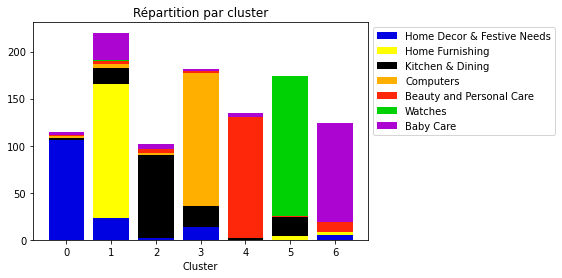

In [169]:
#On regarde les résultats:
res=results[['predicted','True']]
    
df=pd.DataFrame(res.groupby(by=['predicted','True'])[['True']].aggregate('count').unstack().values).fillna(0)
df.columns=labels
    
    
r=range(7)
    
a=np.zeros(7)
for j in range(7):
    a+=df[labels[j]]
    plt.bar(r, df[labels[j]],bottom=a-df[labels[j]], color=colors[j],label=labels[j])
plt.title("Répartition par cluster")
plt.xlabel("Cluster")
plt.ylim=(0,350)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [170]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

tf_vectorizer = CountVectorizer()

dtm_tf = tf_vectorizer.fit_transform(texte['bow'].values)

# Définition de la méthode de pondération TF-IDF
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(texte['bow'].values)

# Entrainement de TF DTM
lda_tf = LatentDirichletAllocation(n_components=13, random_state=0)
lda_tf.fit(dtm_tf)
# Entrainement de TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=13, random_state=0)
lda_tfidf.fit(dtm_tfidf)

# Visualisation de l'algorithme LDA TFIDF DTM (qui est la plus fiable en général)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.289978 -0.195213       1        1  13.425596
11     0.171707  0.062526       2        1  12.028950
1     -0.065157  0.057448       3        1   9.656017
3     -0.117974 -0.219521       4        1   9.648150
8     -0.011390  0.031836       5        1   8.452198
6     -0.057623  0.015383       6        1   7.068849
0      0.010630  0.116757       7        1   6.825192
2     -0.132081 -0.132579       8        1   6.703137
5      0.048199  0.133012       9        1   6.646831
10    -0.070949 -0.016071      10        1   5.998903
9      0.012084  0.091831      11        1   5.293584
7     -0.049418  0.042898      12        1   4.669815
12    -0.028006  0.011692      13        1   3.582776, topic_info=         Term       Freq      Total Category  logprob  loglift
762     watch  40.000000  40.000000  Default  30.0000  30.0000
21     analog  33.000000  33.000000  Default  29.0000  29.0000
137     combo  37.000000  37.000000  Default  28.0000  28.0000
456       mug  32.000000  32.000000  Default  27.0000  27.0000
627  showpiec  26.000000  26.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
9      adjust   0.489923   1.615243  Topic13  -5.3292   2.1360
51        bag   0.742140   2.553260  Topic13  -4.9139   2.0934
689      tabl   1.325777   8.561552  Topic13  -4.3337   1.4637
303     glass   0.987994   5.597511  Topic13  -4.6278   1.5946
137     combo   1.350915  37.839746  Topic13  -4.3149  -0.0035

[537 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         7  0.762896      aapno
3         7  0.178838   abstract
3         9  0.268257   abstract
3        11  0.447095   abstract
4         3  0.499591  accessori
...     ...       ...        ...
786       1  0.847920         ym
787      12  0.504093      youth
788       7  0.498306     zipper
789       9  0.572320       zone
790       4  0.674580      zyxel

[629 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 12, 2, 4, 9, 7, 1, 3, 6, 11, 10, 8, 13])

In [180]:
#Je sauvegarde les résultats de ces estimations au cas où pour une utilisation plus tard avec les images:
LDA.to_csv('LDA.csv')

/home/samuel/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1050, 13)

In [190]:
KM=pd.DataFrame(km13.transform(X_proj))
KM['prediction']=y
KM.to_csv('KM.csv')

/home/samuel/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
